In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score

from xgboost import XGBClassifier

from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/diabetes.csv')

df.info()

# Data preprocessing






In [6]:
df.isnull().sum()

Unnamed: 0                   0
Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         1
Physical Activity            1
Fruits                       2
Veggies                      1
Heavy Alcohol Consumption    1
Any Health Care              2
No Doctor because of Cost    2
General Health               1
Mental Health                1
Physical Health              1
Difficulty Walking           2
Sex                          1
Age                          1
Education                    1
Income                       1
dtype: int64

In [7]:
df = df.dropna(how='any')
df = df.drop(60000)  # Unknown Income 
df = df.drop(['Unnamed: 0'], axis = 1)  # ID is not a feature

df.isnull().sum()

Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
Physical Activity            0
Fruits                       0
Veggies                      0
Heavy Alcohol Consumption    0
Any Health Care              0
No Doctor because of Cost    0
General Health               0
Mental Health                0
Physical Health              0
Difficulty Walking           0
Sex                          0
Age                          0
Education                    0
Income                       0
dtype: int64

**Missing values** dealt with


In [8]:
df.columns = df.columns.str.replace(' ','_')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70685 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetes_binary            70685 non-null  float64
 1   HighBP                     70685 non-null  float64
 2   High_Cholesterol           70685 non-null  float64
 3   Cholesterol_Check          70685 non-null  float64
 4   BMI                        70685 non-null  float64
 5   Smoker                     70685 non-null  float64
 6   Stroke                     70685 non-null  float64
 7   HeartDiseaseorAttack       70685 non-null  float64
 8   Physical_Activity          70685 non-null  float64
 9   Fruits                     70685 non-null  float64
 10  Veggies                    70685 non-null  float64
 11  Heavy_Alcohol_Consumption  70685 non-null  float64
 12  Any_Health_Care            70685 non-null  float64
 13  No_Doctor_because_of_Cost  70685 non-null  flo

**White spaces** in column names changed to **underscore**

In [9]:
print(df['General_Health'].unique())
print(df['Sex'].unique())
print(df['Education'].unique())
print(df['Income'].unique())

['Medium' 'High' 'Good' 'Low' 'Very Low']
['male' 'female']
['Cat6' 'Cat5' 'Cat4' 'Cat3' 'Cat2' 'Cat1']
['Cat8' 'Cat7' 'Cat6' 'Cat3' 'Cat4' 'Cat1' 'Cat5' 'Cat2']


In [10]:
df = pd.get_dummies(df, columns=['General_Health', 'Sex', 'Education', 'Income'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70685 entries, 0 to 70691
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetes_binary            70685 non-null  float64
 1   HighBP                     70685 non-null  float64
 2   High_Cholesterol           70685 non-null  float64
 3   Cholesterol_Check          70685 non-null  float64
 4   BMI                        70685 non-null  float64
 5   Smoker                     70685 non-null  float64
 6   Stroke                     70685 non-null  float64
 7   HeartDiseaseorAttack       70685 non-null  float64
 8   Physical_Activity          70685 non-null  float64
 9   Fruits                     70685 non-null  float64
 10  Veggies                    70685 non-null  float64
 11  Heavy_Alcohol_Consumption  70685 non-null  float64
 12  Any_Health_Care            70685 non-null  float64
 13  No_Doctor_because_of_Cost  70685 non-null  flo

**Categorical** features **encoded**!

In [11]:
X = df.drop(['Diabetes_binary'], axis=1)
y = df['Diabetes_binary']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [13]:
num = ['BMI', 'Mental_Health', 'Physical_Health', 'Age']
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train[num])
x_test_sc = scaler.transform(x_test[num])

x_train[num] = x_train_sc
x_test[num] = x_test_sc

**Numerical** data is **scaled**

**test & train** sets are **ready** 

In [14]:
def report(actual, prediction):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\n".format(
        accuracy_score(actual, prediction),
        precision_score(actual, prediction),
        recall_score(actual, prediction)))
    print('Confusion Matrix:')
    print(confusion_matrix(actual, prediction))

def my_roc_auc_score(model, X, y): 
  return roc_auc_score(y, model.predict_proba(X)[:,1])

# Classification

In [74]:
# setup parameters for xgboost
param = {'learning_rate' : 0.1,
        'max_depth' : 4,
        'n_estimator' : 200,
        'subsample' : 0.5,
        'colsample_bytree' : 1,
        'random_seed' : 123,
        'eval_metric' : 'auc',
        'verbosity' : 1,
        'early_stopping_rounds' : 10
}

xgbc = XGBClassifier()
xgbc.set_params(**param)

xgbc.fit(x_train, y_train)

pred = xgbc.predict(x_test)

print('Test results: \n')
report(y_test, pred)

Test results: 

Accuracy: 0.757
Precision: 0.737
Recall: 0.800

Confusion Matrix:
[[7574 3029]
 [2124 8479]]


These results are **not good** enough!!!

# Hyper-parameter tuning

In [16]:
xgbc.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': 10,
 'eval_metric': 'auc',
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 1,
 'missing': None,
 'n_estimator': 200,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_seed': 123,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.5,
 'verbosity': 1}

In [18]:
xgbc_tune = XGBClassifier(eval_metric='auc', subsample=0.5) 

learning_rate_list = [0.02, 0.05, 0.1, 0.3]
max_depth_list = [2, 3, 4] 
n_estimators_list = [100, 200, 300] 
colsample_bytree = [0.8, 1]

param_grid = dict(learning_rate=learning_rate_list,
                  max_depth=max_depth_list,
                  n_estimators=n_estimators_list,
                  colsample_bytree=colsample_bytree)

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=10)

grid_search = GridSearchCV(xgbc_tune, param_grid, scoring=my_roc_auc_score, n_jobs=-1, cv=kfold)

grid_result = grid_search.fit(x_train, y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.829302 using {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}


In [79]:
xgbc_final = XGBClassifier(eval_metric='auc', subsample=0.5) 
xgbc_final.set_params(**grid_result.best_params_)

xgbc.fit(x_train, y_train)

print('Test results:')
pred = xgbc.predict(x_test)
report(y_test, pred)

Test results:
Accuracy: 0.757
Precision: 0.737
Recall: 0.800

Confusion Matrix:
[[7574 3029]
 [2124 8479]]


# Visualization

ID 0: {'colsample_bytree': 0.8, 'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 100}
ID 1: {'colsample_bytree': 0.8, 'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 200}
ID 2: {'colsample_bytree': 0.8, 'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 300}
ID 3: {'colsample_bytree': 0.8, 'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 100}
ID 4: {'colsample_bytree': 0.8, 'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 200}
ID 5: {'colsample_bytree': 0.8, 'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 300}
ID 6: {'colsample_bytree': 0.8, 'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 100}
ID 7: {'colsample_bytree': 0.8, 'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 200}
ID 8: {'colsample_bytree': 0.8, 'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 300}
ID 9: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
ID 10: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 2, 'n_estim

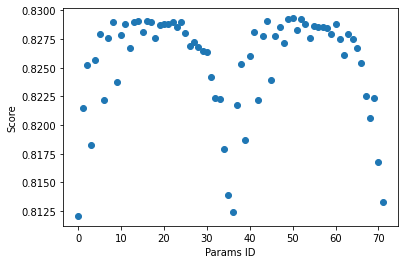

In [73]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

params = np.array(params)
for i in range(params.size):
  print("ID " + str(i) + ": " + str(params[i]))

fig = plt.figure()
plt.scatter(np.arange(0, 72), means)
plt.xlabel('Params ID')
plt.ylabel('Score')
plt.show()